[View in Colaboratory](https://colab.research.google.com/github/agerk/dataScience/blob/master/explaratory_data_analyis_with_python.ipynb)

In [0]:
# Load dana manipulation liberaries
import pandas as pd
import numpy as np

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load data
path = 'https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>Step 1: Analyzing individual feature patterns </h2>

In [3]:
# List data type to help choose the right visualization tools
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [4]:
# Calculate the correlation between variables of type int64 or floa64
df.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.163636,0.144301,-0.022474,-0.195662,0.027956,0.020344,-0.118214,-0.099157,0.121454,-0.121454
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458


In [5]:
# Find correlation for the following columns
 df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<h2> Continous numerical variables</h2>

- `regplot` is used to assess linear relationship between independent variable and target variable (price-- for this example)

(0, 56019.86200001769)

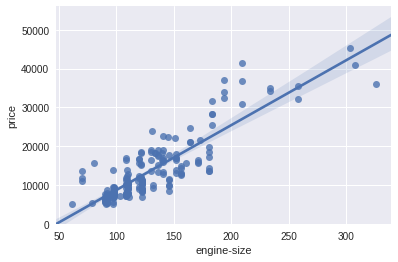

In [6]:
# Check relationship between "engine-size" and "price"
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

As the engine-size goes up, the price goes up. This indicates a positive direct positive correlation between these two variables. 

In [8]:
# correlation between "engine-size" and "price"
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


**Negative linear relationship**

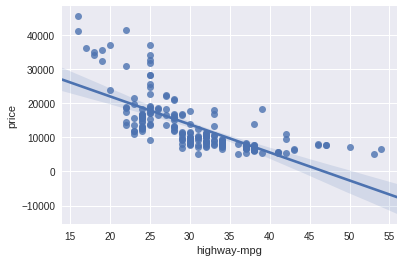

In [9]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [10]:
# Correlation between "highway-mpg" and "price"
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


**Weaker linear relationship**

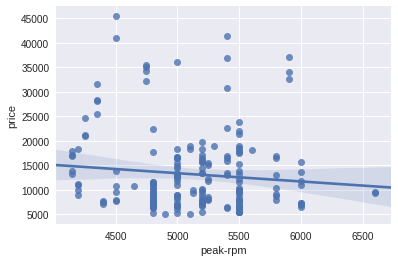

In [12]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.show();

Peak-rpm does not seem like a good predictor of price since the regression line is close to horizontal

In [14]:
# Correlation between 'peak-rpm' and 'price'
df[["peak-rpm", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Check if there is a correlation between "stroke" and "price"

In [15]:
df[["stroke", "price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


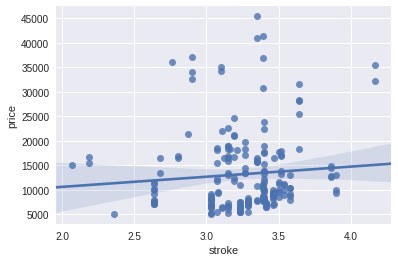

In [17]:
sns.regplot(x="stroke", y="price", data=df)
plt.show()

<h2>Categorical variables</h2>

- these are variables that describe a 'characterstics' of a data unit.
- Box plot is a good way for visualizing categorical variables

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


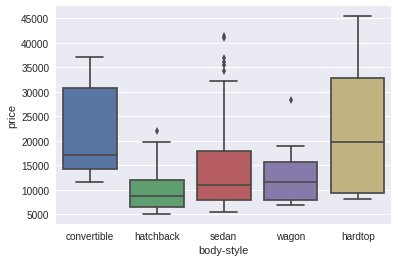

In [20]:
# Plot the distributions of 'price' and 'body-type' 
sns.boxplot(x="body-style", y="price", data=df)
plt.show();

We see that the distribution of price between the different body-style categories have significant overlap. So 'body-style' would not be a good predictor of price

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


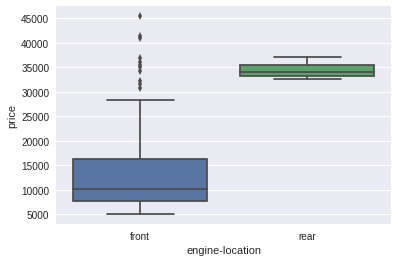

In [21]:
# 'engine-location' and 'price'
sns.boxplot(x='engine-location', y='price', data=df)

The distribution of price between these two engine-location categories, fron and rear, are distinct enough to take engine-location as a potential good predictor of price

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


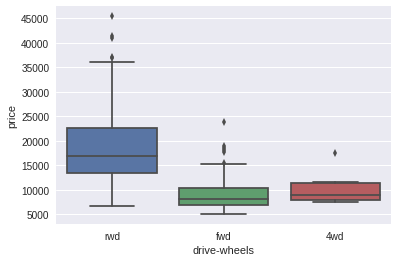

In [23]:
# Examine "drive-wheels" and "price"
sns.boxplot(x="drive-wheels", y="price", data=df)

Here the distribution between price and drive-wheels differ. As such, drive-wheels could be a potential preice predictor

<h2>Step 2: Descriptive Statistical Analysis</h2>

- The `describe` function automatically computes basic statistics for all continous variables. Any NaN vlues are automatically skipped . It will show
  - the count of variables
  - the mean
  - the standard deviation(std)
  - the minimum value
  - the IQR(Interquantile range: 25%, 50% and 75%)
  - the maximum value

In [24]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [25]:
df.describe(include=["object"])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


**Value Counts**
- used for counting the units of each variable 
- it only works on `Pandas Series` not `Pandas dataframe`

In [27]:
# Get value counts on a Series
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [28]:
# Convert Series to Dataframe
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [30]:
# Add drive_wheels_counts column
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': "value_counts"}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [31]:
# Rename the index to 'drive-wheels'
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [33]:
# Repeat the above process for other variables
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location':'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head()

,value_counts
engine-location,
front,198
rear,3


<h2>Grouping</h2>

- data is grouped based on one or more variabes. 
- analysis is performed on the individual groups

In [34]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [39]:
# If we want to know, on average, which type of drive wheel ismost valuable, 
# we can group 'drive-wheels' and then average them

df_group_one = df[["drive-wheels", "body-style", "price"]]
# Calculate average price
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()
df_group_one


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [42]:
# Groupping up multiple variables
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test = df_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
grouped_test

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Pivot table simplify the presentation of grouped data

In [44]:
grouped_pivot = grouped_test.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [45]:
# Fill missing values with 0
grouped_pivot=grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [48]:
# Average price by 'body-style'
df_gptest2 = df[['drive-wheels','body-style','price']]
grouped_test2 = df_gptest2.groupby(['body-style'], as_index=False).mean()
grouped_test2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


**Visualize variables: Drive Wheels and Bod Style vs Price**

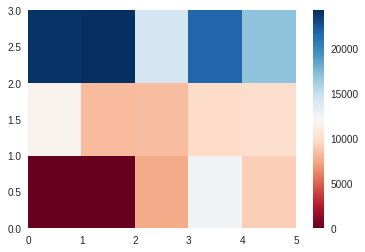

In [50]:
# Create a heat map
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The heatmap plots the target variable proportional to color with respect to the variables 'drive-wheel' and 'body-style'. Modify the defual labels for better visualization 

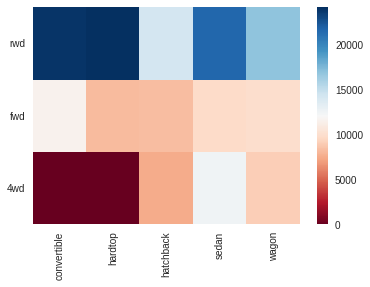

In [60]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap = 'RdBu')

# label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# shift ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)

# inser labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h2>Correlation and Causation</h2>

**Correlation**: a measure of the extent of interdependence between variables

**Causation**: the relationship between cause and effect between two variables

<h3>Pearson Correlation</h3>

- It measures the `linear` dependence between two variables, X and Y
- The resulting coefficient is a vale between -1 and 1inclusive
  - **1**: total positive linear correlation,
  - **0**: no linear correlation. The two variable do not affect each other
  - **-1**: total negative linear correlation 

In [61]:
df.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.163636,0.144301,-0.022474,-0.195662,0.027956,0.020344,-0.118214,-0.099157,0.121454,-0.121454
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458


**Significant of correlation estimate**

- **`P-value`**: is the probability value that the correlation between these two variables is statistically significant. 
  - We choose a significant level of 0.05-- whcih meant that we are 95% confident that the correlation between the variables is significant 
- By convention, when `P-value` is:
  - < 0.001; we say there is a **strong** evidence that the correlation is significant
  - <0.05; we say there is **moderate** evidence that the correlation is significant
  - < 0.1; there is a **weak** evidence that the correlation is significant
  - > 0.1; there is **no** evidence that the correlation is significant

In [0]:
# Import "stats" model from "scipy" liberary
from scipy import stats

In [63]:
# Calculate the Pearson Correlation Coefficient 
# and P-value of 'wheel-base' and price
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Corr Coefficient is {} with P-value of P = {}".format(pearson_coef, p_value))

The Pearson Corr Coefficient is 0.5846418222655081 with P-value of P = 8.076488270732955e-20


Conclusion: Since the P-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship is weak

In [64]:
# Horsepower vs Price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Corr Coefficient is {} with P-value of P = {}".format(pearson_coef, p_value))

The Pearson Corr Coefficient is 0.8095745670036559 with P-value of P = 6.36905742825998e-48


Conclusion: Since the P-value is < 0.001, the correlation between wheel-base and price is statistically significant, and the linear relationship is quite strong(~0.809)

<h2> ANOVA: Analysis of Variance</h2>

- Its used to test whether there are significant differences between the means of two or more groups.
it returns two params

**F-test score**: ANOVA assumes the means of all groups are the same.
- it calculate the the deviation of the actual means from the assumption and reports it as the F-test score
- a **larger** score means there is a larger difference between the means

**P-value**: P-value tells the statistical significance of the calculated score value

In [66]:
# ANOVA of Drive wheels and price
grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [67]:
# we can get the values of the method group usng 'get_group'
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [69]:
# ANOVA

# we can use the function 'f_oneway' in the module 'stats' 
# to obtain the F-test score and P-value

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'],
                              grouped_test2.get_group('rwd')['price'],
                             grouped_test2.get_group('4wd')['price'])
print("ANOVA results; F={}, P ={}".format(f_val, p_val))


ANOVA results; F=67.95406500780399, P =3.3945443577151245e-23


Result shows stron correlation, implying certain statistical significance. 

Does this mean all three tested groups are all highly correlated?

Let's do test groups separately

In [70]:
# fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'],
                              grouped_test2.get_group('rwd')['price'])
print("ANOVA results; F={}, P ={}".format(f_val, p_val))


ANOVA results; F=130.5533160959111, P =2.2355306355677845e-23


In [71]:
# 4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('rwd')['price'],
                             grouped_test2.get_group('4wd')['price'])
print("ANOVA results; F={}, P ={}".format(f_val, p_val))


ANOVA results; F=8.580681368924756, P =0.004411492211225333


In [72]:
# 4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'],
                              grouped_test2.get_group('4wd')['price'])
print("ANOVA results; F={}, P ={}".format(f_val, p_val))


ANOVA results; F=0.6654657502523033, P =0.41620116697845666


<h2>Conclusion: Important variables</h2>

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

Categorical variables:
- Drive-wheels

The next notebook will buildon this and develop machine learning models

*This notebook was insired by IBM Applied Data Science courseon Coursera*